Project 4 - Scientific Computing - Kimi Kreilgaard (Twn176)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Only Sexual Contact

In [2]:
# Lets first define our system of first order ODE's in one function
def diff_eq_HIV(X, params):
    """
    Vector function defining our system of differential equations describing the spread of the HIV virus
    
    INPUTS:
    X = vector containing our variables: *X = x1, x2, y, z (len=4)
    params = list with known (or assumed) parameters (len=17)
             a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r
    
    OUTPUTS:
    diff_X = vector containing the solutions: *diff_X = dx1/dt, dx2/dt, dy/dt, dz/dt
    """
    # Make sure inputs are ndarrays if not convert
    if not isinstance(X,np.ndarray):
        X = np.array(X) #can convert tuple or lists into ndarrays
    if not isinstance(params,np.ndarray):
        params = np.array(params)
        
    # Unpack X
    x1, x2, y, z = X.T
    
    # Unpack parameters
    a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r = params.T
    
    # Define diff equations
    diff_x1 = a1*x1*(p1-x1) + a2*x2*(p1-x1) + e*(p1-x1) - r1*x1
    diff_x2 = b1*x1*(p2-x2) + b2*x2*(p2-x2) + b3*y*(p2-x2) + e*(p2-x2) - r2*x2
    diff_y = c1*x2*(q-y) + c2*z*(q-y) + e*(q-y)  - r3*y
    diff_z = d1*y*(r-z) + e*(r-z) - r4*z
    
    # Pack output into a single vector
    diff_X = np.array([diff_x1, diff_x2, diff_y, diff_z])
    
    return diff_X

In [3]:
# Make a forward Euler method
def forward_Euler(X, params, step_size, diff_eq):
    """
    Forward Euler method for first order ODE's
    
    INPUTS:
    X = vector containing our variables: *X = x1, x2, y, z (len=4)
    params = list with known (or assumed) parameters (len=17)
             a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r
    step_size = dt, the step to take in y(t+h)
    diff_eq = the differential equation to solve
    """
    
    # Get the slopes (dx1/dt, dx2/dt, dy/dt, dz/dt)
    diff_X = diff_eq(X, params)
    
    # Calculate next values of x_1, x_2, y and z with forward Euler
    new_X = X + step_size * diff_X
    
    return new_X

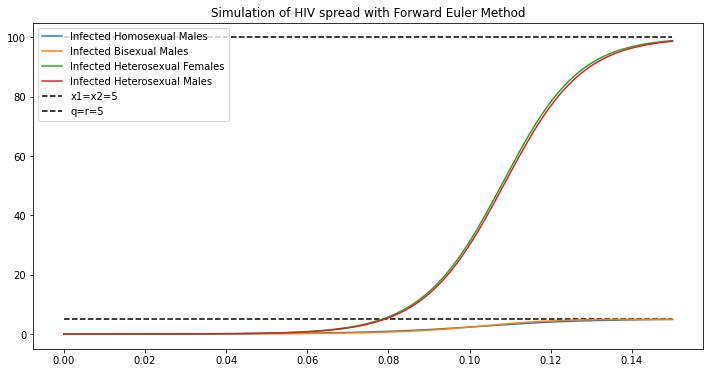

In [4]:
# Initial conditions and parameters
parameters = [10, 5, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with Euler forward
for i in range(N-1):
    X_arr[:,i+1] = forward_Euler(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with Forward Euler Method')
plt.legend()
plt.show()

<font color='red'> hvad er t??? har alle sex med en om dagen jeg er forvirret hvad ebtyder t </font>

In [5]:
# Define Runge Kutta method
def Runge_Kutta_4th(X, params, step_size, diff_eq):
    
    # Calculate the coefficients k (time is not explicit here as in powerpoint)
    k1 = diff_eq(X, params)
    k2 = diff_eq(X + (step_size/2)*k1, params)
    k3 = diff_eq(X + (step_size/2)*k2, params)
    k4 = diff_eq(X + step_size*k3, params)
    
    # Calculate next values of x_1, x_2, y and z with rk4
    new_X = X + (step_size/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return new_X

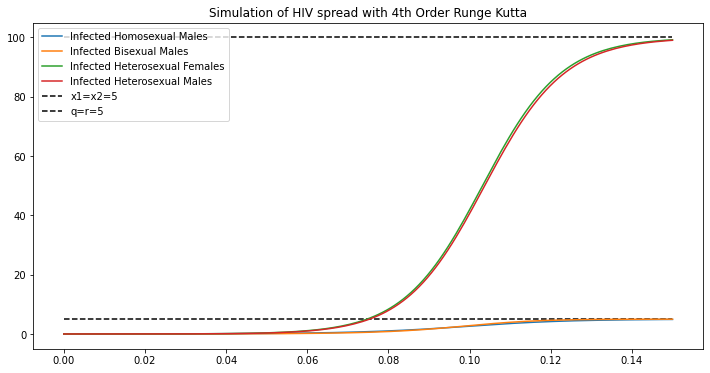

In [6]:
# Initial conditions and parameters
parameters = [10, 5, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with rk4
for i in range(N-1):
    X_arr[:,i+1] = Runge_Kutta_4th(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with 4th Order Runge Kutta')
plt.legend()
plt.show()

# Sexual Contact and Blood Transfusions (no frac)

In [7]:
# Initial conditions and parameters
e_val = 0.001
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

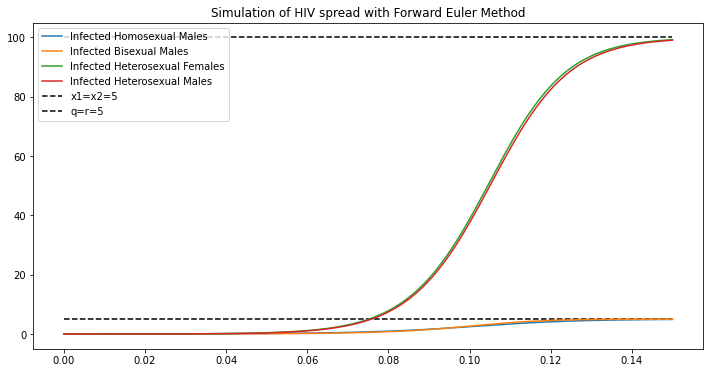

In [8]:
# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with Euler forward
for i in range(N-1):
    X_arr[:,i+1] = forward_Euler(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with Forward Euler Method')
plt.legend()
plt.show()

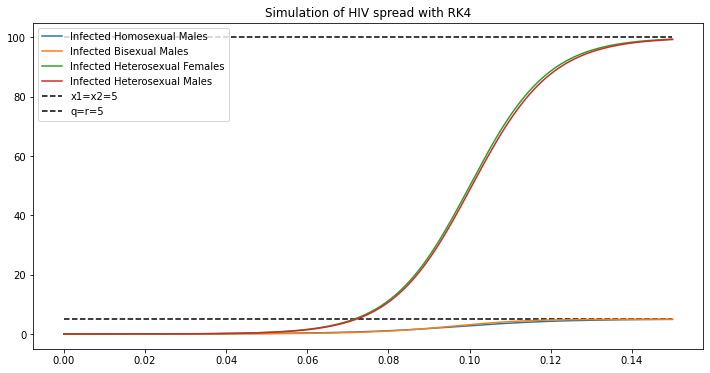

In [9]:
# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with Euler forward
for i in range(N-1):
    X_arr[:,i+1] = Runge_Kutta_4th(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with RK4')
plt.legend()
plt.show()

# All Effects
Initially r=0.05

In [3]:
# Initial conditions and parameters
e_val = 0.001
r_val = 0.05
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, r_val, r_val, r_val, r_val, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with Euler forward
for i in range(N-1):
    X_arr[:,i+1] = forward_Euler(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with Forward Euler Method')
plt.legend()
plt.show()

NameError: name 'np' is not defined

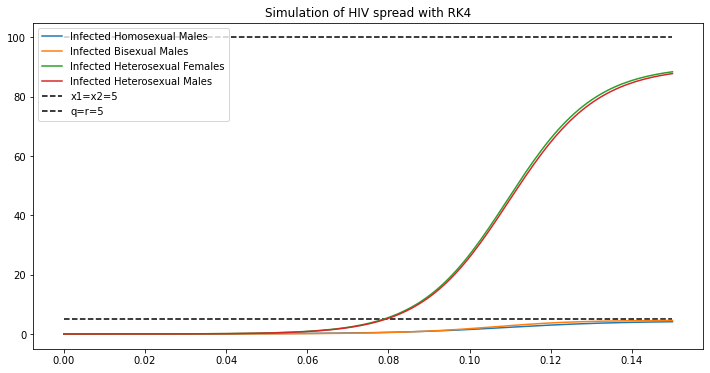

In [12]:
# Set up things to simulate the next 100 time steps
N = 150
X_arr = np.zeros((len(X0),N))
X_arr[:,0] = X0
t0 = 0
dt = 0.001
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate with Euler forward
for i in range(N-1):
    X_arr[:,i+1] = Runge_Kutta_4th(X_arr[:,i], parameters, dt, diff_eq_HIV)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot( t_arr, X_arr[0,:], label='Infected Homosexual Males' )
ax.plot( t_arr, X_arr[1,:], label='Infected Bisexual Males' )
ax.plot( t_arr, X_arr[2,:], label='Infected Heterosexual Females' )
ax.plot( t_arr, X_arr[3,:], label='Infected Heterosexual Males' )

ax.hlines(5, 0,0.15, color='k', linestyle='dashed', label='x1=x2=5')
ax.hlines(100, 0,0.15, color='k', linestyle='dashed', label='q=r=5')
ax.set_title('Simulation of HIV spread with RK4')
plt.legend()
plt.show()

<font color='red'> something is off? </font>

In [1]:
14817/515

28.770873786407765